In [36]:
import re
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from datetime import datetime, timezone
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer


nltk.download("rslp")


[nltk_data] Downloading package rslp to /home/marvin-
[nltk_data]     linux/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [47]:
def stemming(texto: str) -> str:
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    palavras = [stemmer.stem(palavra) for palavra in texto.split()]
    return " ".join(palavras)


def remover_stop_words(texto: str, stop_words: list) -> str:
    stopwords = nltk.corpus.stopwords.words("portuguese")
    # stopwords = list(filter(lambda x: x not in list_to_remove, stopwords))
    stopwords.extend(stop_words)

    # stopwords.extend(
    #     [
    #         "rt",
    #         "http",
    #         "https",
    #         "com",
    #         "co",
    #         "org",
    #         "www",
    #         "...",
    #         "q",
    #         "d",
    #         "p",
    #         "ai",
    #         "pq",
    #         "vc",
    #         "nao",
    #         "n",
    #     ]
    # )
    texto = " ".join(list(filter(lambda x: x not in stopwords, texto.split())))
    return texto


def formatar_texto(texto: str) -> str:
    texto = (
        re.sub(r"(http\S+)|(@\w+)", "", texto)  # remove links, usuários #
        .replace(".", "")
        .replace(";", "")
        .replace("—", "")
        # .replace(")", "")
    )

    texto = re.sub(r"(  +)", " ", texto)  # remove espaços duplos
    texto = texto.lower().strip()

    return texto


def datetime_to_period(hour):
    if hour >= 0 and hour < 6:
        return "overnight"
    elif hour >= 6 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 18:
        return "afternoon"
    elif hour >= 18 and hour < 24:
        return "night"


def datetime_to_hour(temp_str: str) -> int:
    datetime_object = datetime.strptime(temp_str, "%a %b %d %H:%M:%S %z %Y")
    return (
        datetime_object.replace(tzinfo=timezone.utc).astimezone(tz=None).hour
    )  # retorna a hora em formato inteiro ajustado para o fuso horário do Brasil


def get_top_ngram(corpus, gram_size=None, top_gram=10):
    vec = CountVectorizer(ngram_range=(gram_size, gram_size)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_gram]


In [3]:
df = pd.read_csv("../data/raw/NoThemeTweets.csv").drop(
    columns=["id", "query_used"], axis=1  # remove colunas desnecessárias
)

df.sample(30)


,tweet_text,tweet_date,sentiment
284750,"acabou aqui pra mim, olha isso :( https://t.co...",Tue Sep 04 12:22:14 +0000 2018,Negativo
586705,Queria realmente desbloquear meu 3ds :(,Fri Sep 21 03:03:47 +0000 2018,Negativo
316172,"@isabellelevinne oi, me chama na dm :(",Thu Sep 06 09:37:55 +0000 2018,Negativo
587994,"aee partiu emergencia essa hra da nt, com aula...",Fri Sep 21 02:17:51 +0000 2018,Negativo
677563,Oi :) — Oi https://t.co/XDwLsFlGqx,Wed Sep 26 00:48:48 +0000 2018,Positivo
777014,@laurentwd simm ele sempre será parte da nossa...,Mon Oct 08 11:58:58 +0000 2018,Negativo
653512,Setembro chegando ao fim junto com a vontade d...,Mon Sep 24 21:47:24 +0000 2018,Positivo
488959,Agr tenho que voltar pra realidade de estudar ...,Sun Sep 16 20:25:33 +0000 2018,Negativo
251546,@natalypadilha nao é nada gostoso isso :( PAKD...,Fri Aug 31 13:59:13 +0000 2018,Negativo
547057,@HikariJuh Ai eu tbm não :( mas é meu sonho de...,Wed Sep 19 03:28:49 +0000 2018,Negativo


In [4]:
df.drop_duplicates(["tweet_text"], inplace=True)  # remove textos duplicados
df["tweet_text"] = df["tweet_text"].apply(
    lambda tweet: formatar_texto(texto=tweet)
)  # formata texto do dataframe

df.loc[350538, "tweet_text"]


'isto foi tão à toa, fds :((( ❤'

In [5]:
df = df.assign(
    number_words=df.tweet_text.apply(lambda x: len(x.split(" "))),
)  # adiciona coluna com número de palavras

df = df.assign(
    avg_word_length=df.tweet_text.str.split()
    .apply(lambda x: [len(i) for i in x])
    .map(lambda x: np.mean(x))
)  # adiciona coluna com média de caracteres por palavra no tweet

formated_df = df.drop(
    df[df.number_words < 5].index
)  # remove tweets com menos de 5 palavras

print(df.shape)
formated_df


(776753, 5)


,tweet_text,tweet_date,sentiment,number_words,avg_word_length
0,14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,5,2.400000
1,o meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,9,2.666667
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,11,4.636364
3,:d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,2.800000
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveita...",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,4.100000
...,...,...,...,...,...
785809,acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,7,3.142857
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,29,3.931034
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,15,3.666667
785812,foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,6,3.500000


In [6]:
print(formated_df.describe())

formated_df.sample(5)


        number_words  avg_word_length
count  645314.000000    645314.000000
mean       14.496905         4.049946
std         9.941685         0.731306
min         5.000000         1.000000
25%         7.000000         3.600000
50%        11.000000         4.000000
75%        18.000000         4.428571
max        85.000000        55.200000


,tweet_text,tweet_date,sentiment,number_words,avg_word_length
783982,okay então a porta de um armário que está na c...,Fri Oct 12 14:56:01 +0000 2018,Positivo,41,4.0
675771,namoral partiu cs go joga só uma :d,Wed Sep 26 03:06:12 +0000 2018,Positivo,8,3.5
476983,"e agora, claramente que não sei o que vestir :)))",Sat Sep 15 18:47:01 +0000 2018,Positivo,10,4.0
498526,saudade de vc lá sério? :),Mon Sep 17 01:46:52 +0000 2018,Positivo,6,3.5
682390,nao sou brasileiro faco o meu melhor :),Tue Sep 25 19:59:52 +0000 2018,Positivo,8,4.0


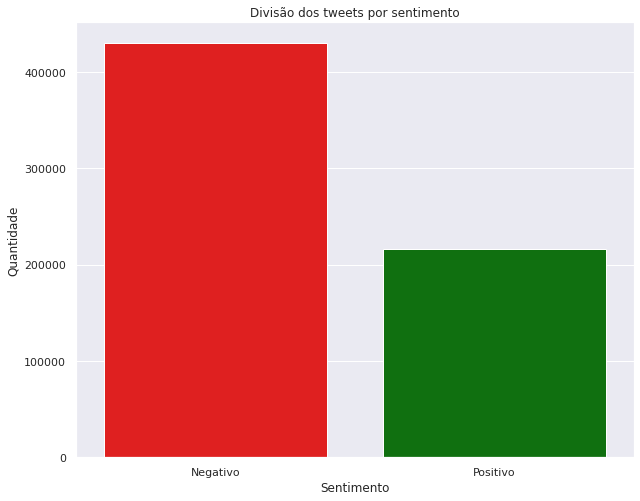

In [7]:
sentiments = formated_df["sentiment"].value_counts()
sns.set(rc={"figure.figsize": (10, 8)})
sns.barplot(
    x=sentiments.index,
    y=sentiments.values,
    palette={"Positivo": "green", "Negativo": "red"},
)
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.title("Divisão dos tweets por sentimento")

plt.show()


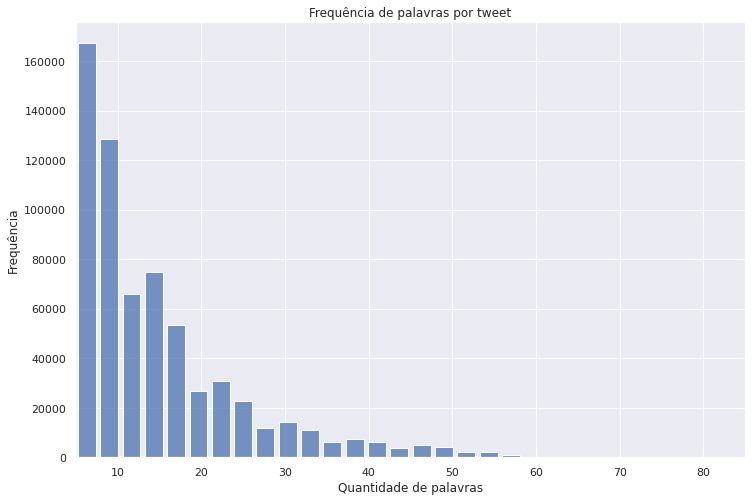

In [8]:
sns.set(rc={"figure.figsize": (12, 8)})
sns.histplot(data=formated_df, x="number_words", bins=30, shrink=0.8)

plt.xlabel("Quantidade de palavras")
plt.ylabel("Frequência")
plt.title("Frequência de palavras por tweet")
plt.xlim(formated_df.number_words.min(), formated_df.number_words.max())
plt.show()


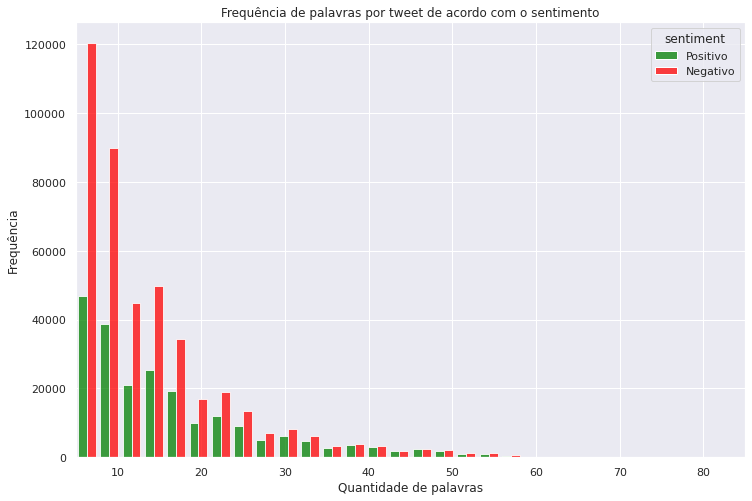

In [9]:
sns.set(rc={"figure.figsize": (12, 8)})
sns.histplot(
    data=formated_df,
    x="number_words",
    hue="sentiment",
    bins=30,
    palette={"Positivo": "green", "Negativo": "red"},
    multiple="dodge",
    shrink=0.8,
)
plt.xlabel("Quantidade de palavras")
plt.ylabel("Frequência")
plt.title("Frequência de palavras por tweet de acordo com o sentimento")
plt.xlim(formated_df.number_words.min(), formated_df.number_words.max())
plt.show()


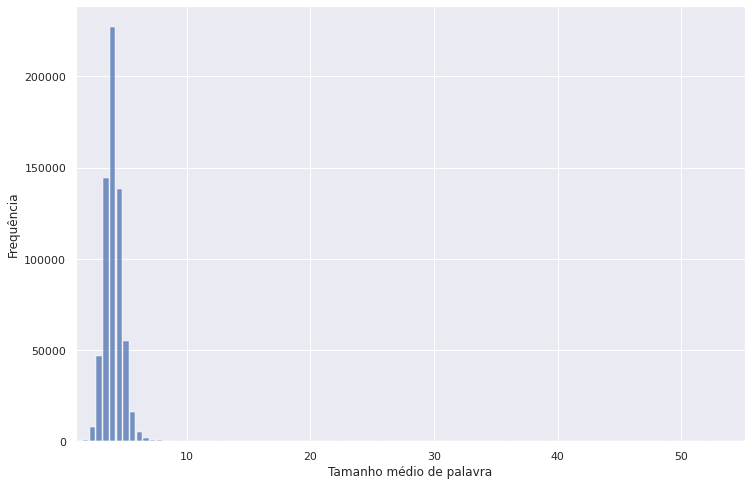

In [10]:
sns.set(rc={"figure.figsize": (12, 8)})

sns.histplot(data=formated_df, x="avg_word_length", bins=100, shrink=0.8)
plt.xlabel("Tamanho médio de palavra")
plt.ylabel("Frequência")
plt.xlim(formated_df["avg_word_length"].min(), formated_df["avg_word_length"].max())
plt.show()


In [11]:
df_positivo = formated_df.query("sentiment == 'Positivo'")
df_negativo = formated_df.query("sentiment == 'Negativo'")
df_all = formated_df

positive_text = " ".join(df_positivo.tweet_text)
negative_text = " ".join(df_negativo.tweet_text)
all_text = " ".join(df_all.tweet_text)

# positive_filter = remover_stop_words(positive_text)
# negative_filter = remover_stop_words(negative_text)


In [12]:
formated_df = formated_df.assign(
    day_period=formated_df.tweet_date.apply(
        lambda x: datetime_to_period(datetime_to_hour(x))
    )
)

formated_df


,tweet_text,tweet_date,sentiment,number_words,avg_word_length,day_period
0,14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,5,2.400000,overnight
1,o meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,9,2.666667,overnight
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,11,4.636364,overnight
3,:d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,2.800000,overnight
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveita...",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,4.100000,overnight
...,...,...,...,...,...,...
785809,acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,7,3.142857,morning
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,29,3.931034,morning
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,15,3.666667,morning
785812,foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,6,3.500000,morning


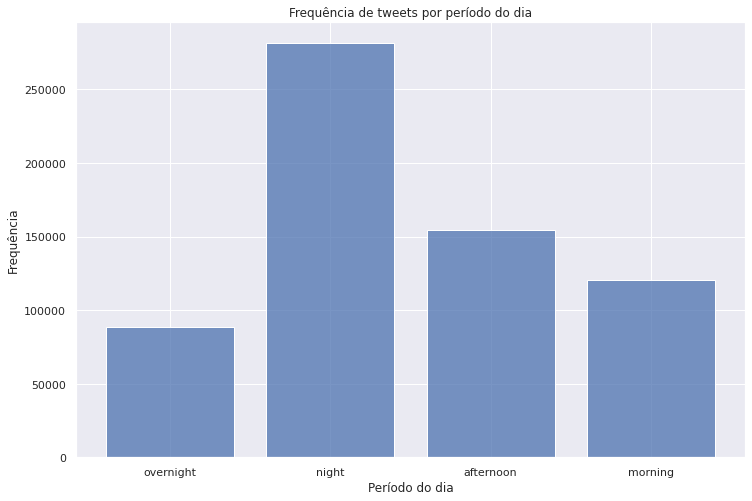

In [13]:
sns.histplot(data=formated_df, x="day_period", bins=5, shrink=0.8)
plt.xlabel("Período do dia")
plt.ylabel("Frequência")
plt.title("Frequência de tweets por período do dia")
plt.show()


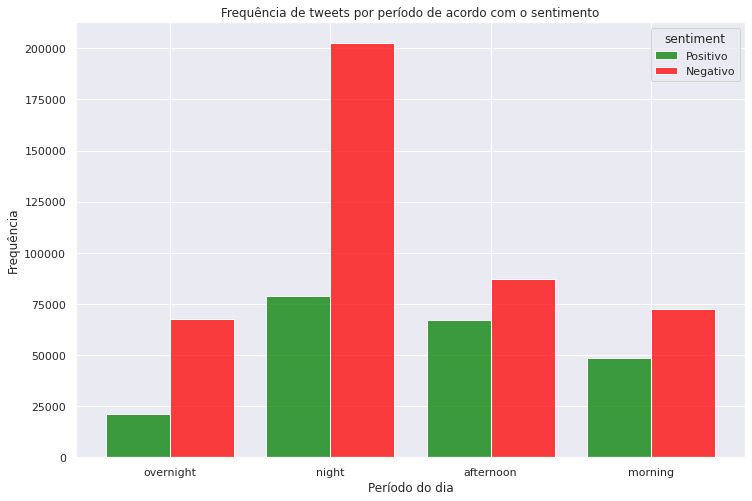

In [14]:
sns.histplot(
    data=formated_df,
    x="day_period",
    hue="sentiment",
    bins=5,
    palette={"Positivo": "green", "Negativo": "red"},
    multiple="dodge",
    shrink=0.8,
)
plt.xlabel("Período do dia")
plt.ylabel("Frequência")
plt.title("Frequência de tweets por período de acordo com o sentimento")
plt.show()


In [15]:
formated_df


,tweet_text,tweet_date,sentiment,number_words,avg_word_length,day_period
0,14 para eu ir :),Tue Aug 21 04:35:39 +0000 2018,Positivo,5,2.400000,overnight
1,o meu like eu já dei na época :),Tue Aug 21 04:32:55 +0000 2018,Positivo,9,2.666667,overnight
2,eu só queria conseguir comer alguma coisa pra ...,Tue Aug 21 04:32:37 +0000 2018,Positivo,11,4.636364,overnight
3,:d que lindo dia !,Tue Aug 21 04:32:33 +0000 2018,Positivo,5,2.800000,overnight
4,"pq da pr jeito!!é uma ""oferta"", ha q aproveita...",Tue Aug 21 04:32:21 +0000 2018,Positivo,10,4.100000,overnight
...,...,...,...,...,...,...
785809,acordar 8 horas é tão bom :),Fri Oct 12 11:10:01 +0000 2018,Positivo,7,3.142857,morning
785810,"olá, mayck você já é cliente claro? caso não s...",Fri Oct 12 11:16:02 +0000 2018,Positivo,29,3.931034,morning
785811,opa tava na merda mm e fiquei logo mais feliz ...,Fri Oct 12 11:12:49 +0000 2018,Positivo,15,3.666667,morning
785812,foi como a tua lealdade :),Fri Oct 12 11:11:24 +0000 2018,Positivo,6,3.500000,morning


analyzed stopwords:
 ['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivesse

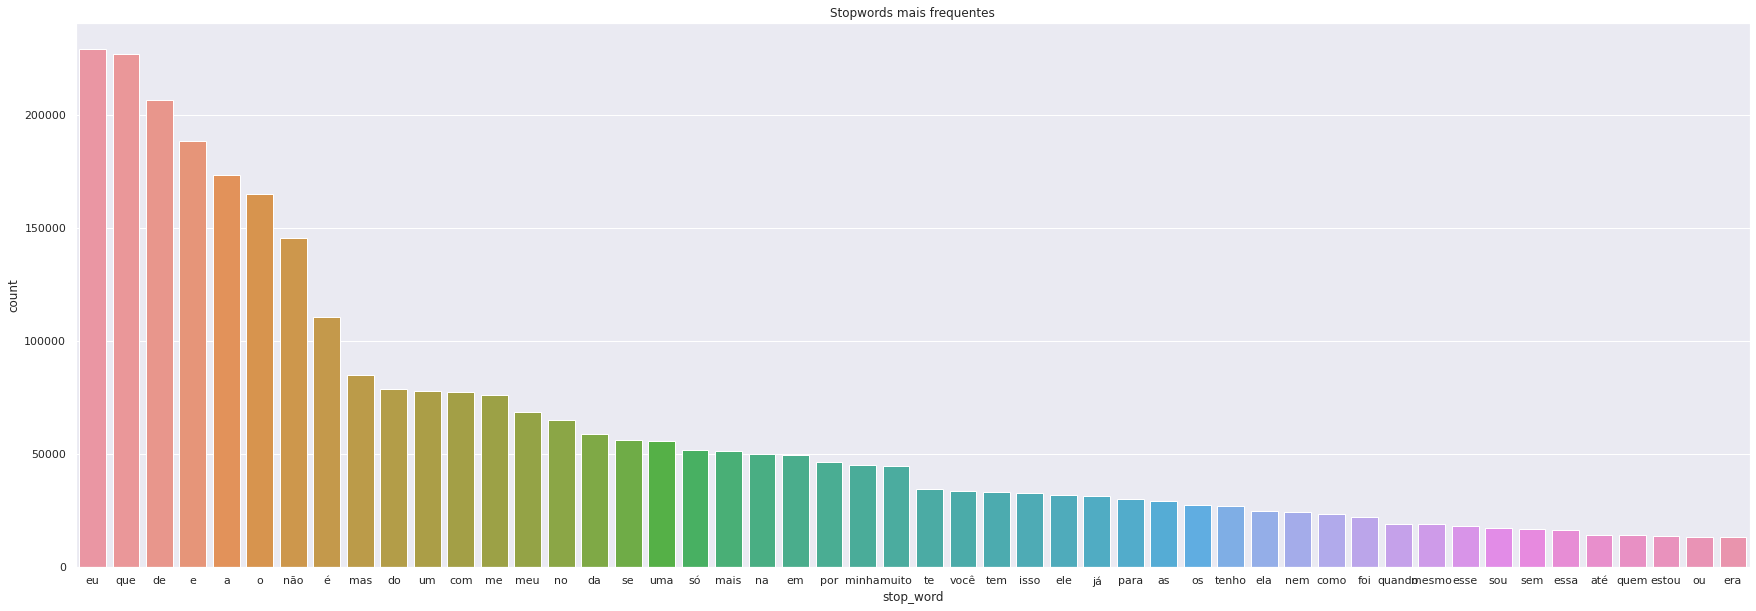

In [16]:
from collections import defaultdict

dic = defaultdict(int)

stopwords = nltk.corpus.stopwords.words("portuguese")

print("analyzed stopwords:\n", stopwords)


for word in (all_text).split():
    if word in stopwords:
        dic[word] += 1


top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes")
plt.show()


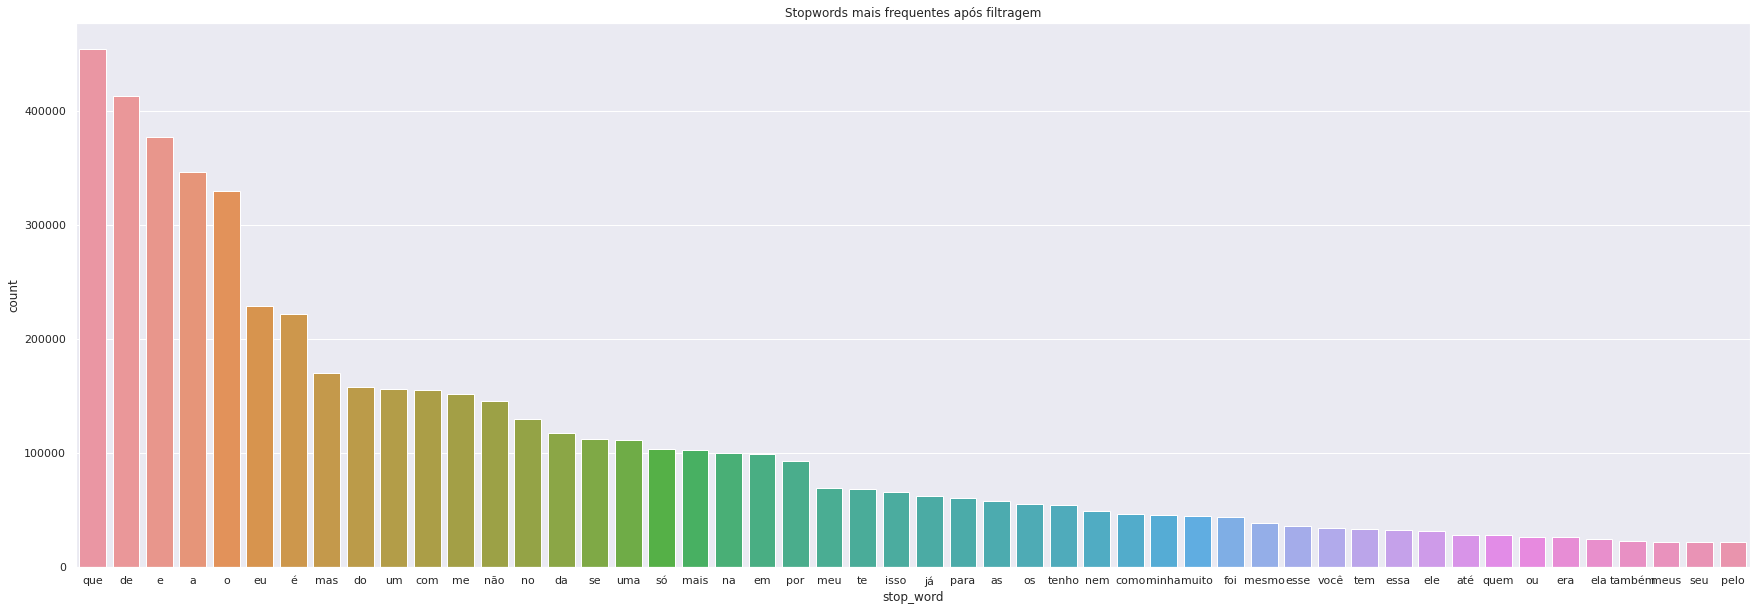

In [17]:
relevant_stop_words = [
    "eu",
    "não",
    "meu",
    "minha",
    "muito",
    "você",
    "tem",
    "ele",
    "ela",
    "quando",
    "sou",
    "você",
    "sem",
    "estou",
]  # stopwords consideradas relevantes para análise de sentimento, serão mantinidas em todo o processo de análise
stopwords = list(
    filter(lambda x: x not in relevant_stop_words, stopwords)
)  # remove do conjunto de stopwords palavras que não serão consideradas para filtragem

for word in all_text.split():
    if word in stopwords:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:50]  # top 50 stopwords


stopwords_df = pd.DataFrame(top, columns=["stop_word", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="stop_word", y="count", data=stopwords_df)
plt.title("Stopwords mais frequentes após filtragem")
plt.show()


In [18]:
from collections import Counter


counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)


[(':(', 349885), ('eu', 229051), ('que', 227046), ('de', 206458), ('e', 188375), ('a', 173204), ('o', 164955), (':)', 147926), ('não', 145389), ('é', 110706), ('mas', 84999), ('do', 78792), ('um', 77857), ('com', 77444), ('pra', 76035), ('me', 75861), ('meu', 68694), ('no', 64818), ('da', 58698), ('se', 56063), ('uma', 55691), ('só', 51582), ('mais', 51346), ('na', 49762), ('q', 49730), ('em', 49494), ('por', 46291), ('minha', 45215), ('muito', 44550), ('queria', 43257), ('to', 39204), ('vou', 38474), ('te', 34210), ('você', 33736), ('tem', 33034), ('isso', 32783), (':((', 31801), ('ele', 31787), ('vai', 31773), ('já', 31217), ('para', 30164), ('vc', 29319), ('as', 29073), ('n', 27928), ('os', 27525), ('ter', 27430), ('tenho', 26901), ('pq', 26414), ('ser', 25997), ('tá', 24852), ('ela', 24778), (':d', 24374), ('dia', 24291), ('nem', 24266), ('bem', 24045), ('triste', 23468), ('como', 23334), ('tão', 22820), ('tô', 22125), ('ver', 21923), ('amo', 21895), ('foi', 21862), ('tudo', 21329)

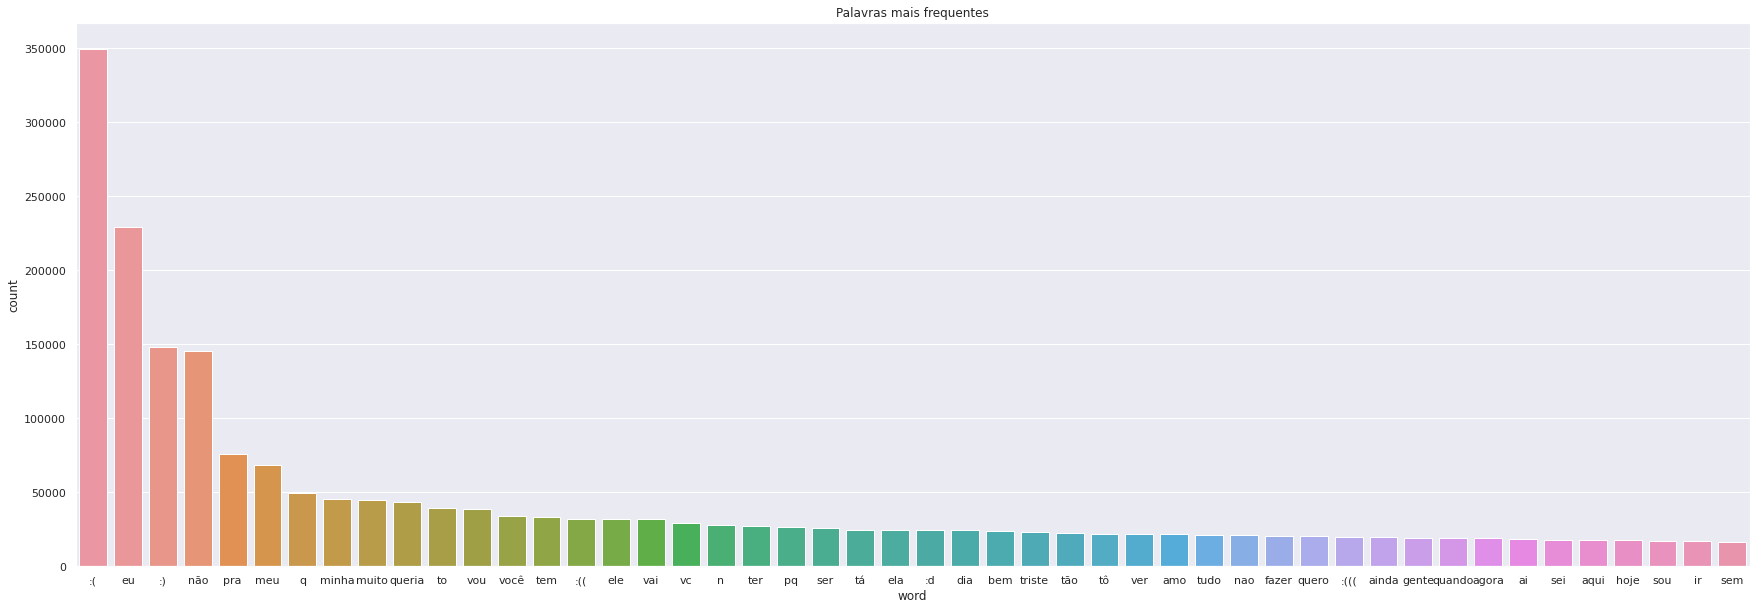

In [19]:
most_common_words = list(zip(x, y))

most_common_words_df = pd.DataFrame(
    most_common_words, columns=["word", "count"]
)  # cria um dataframe com as palavras mais frequentes


most_common_words_df

sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_df)
plt.title("Palavras mais frequentes")
plt.show()


In [55]:
print(len(stopwords))
invalid_terms = [
    ":p",  # indentificava apenas como "p"
    ":d",  # indentificava apenas como "d"
    "(",
    "pra",
    "q",
    "_",
    "((",
    "pq",
    "ai"
]  # palavras inrelevantes para análise de sentimento, ou termos abreviados já contidos em stopwords

stopwords.extend(invalid_terms)

print(len(stopwords))


counter = Counter(all_text.split())
most = counter.most_common(80)
print(most)
print(len(most))

x, y = [], []
for word, count in most:
    if word not in stopwords:
        x.append(word)
        y.append(count)


224
236
[(':(', 349885), ('eu', 229051), ('que', 227046), ('de', 206458), ('e', 188375), ('a', 173204), ('o', 164955), (':)', 147926), ('não', 145389), ('é', 110706), ('mas', 84999), ('do', 78792), ('um', 77857), ('com', 77444), ('pra', 76035), ('me', 75861), ('meu', 68694), ('no', 64818), ('da', 58698), ('se', 56063), ('uma', 55691), ('só', 51582), ('mais', 51346), ('na', 49762), ('q', 49730), ('em', 49494), ('por', 46291), ('minha', 45215), ('muito', 44550), ('queria', 43257), ('to', 39204), ('vou', 38474), ('te', 34210), ('você', 33736), ('tem', 33034), ('isso', 32783), (':((', 31801), ('ele', 31787), ('vai', 31773), ('já', 31217), ('para', 30164), ('vc', 29319), ('as', 29073), ('n', 27928), ('os', 27525), ('ter', 27430), ('tenho', 26901), ('pq', 26414), ('ser', 25997), ('tá', 24852), ('ela', 24778), (':d', 24374), ('dia', 24291), ('nem', 24266), ('bem', 24045), ('triste', 23468), ('como', 23334), ('tão', 22820), ('tô', 22125), ('ver', 21923), ('amo', 21895), ('foi', 21862), ('tudo'

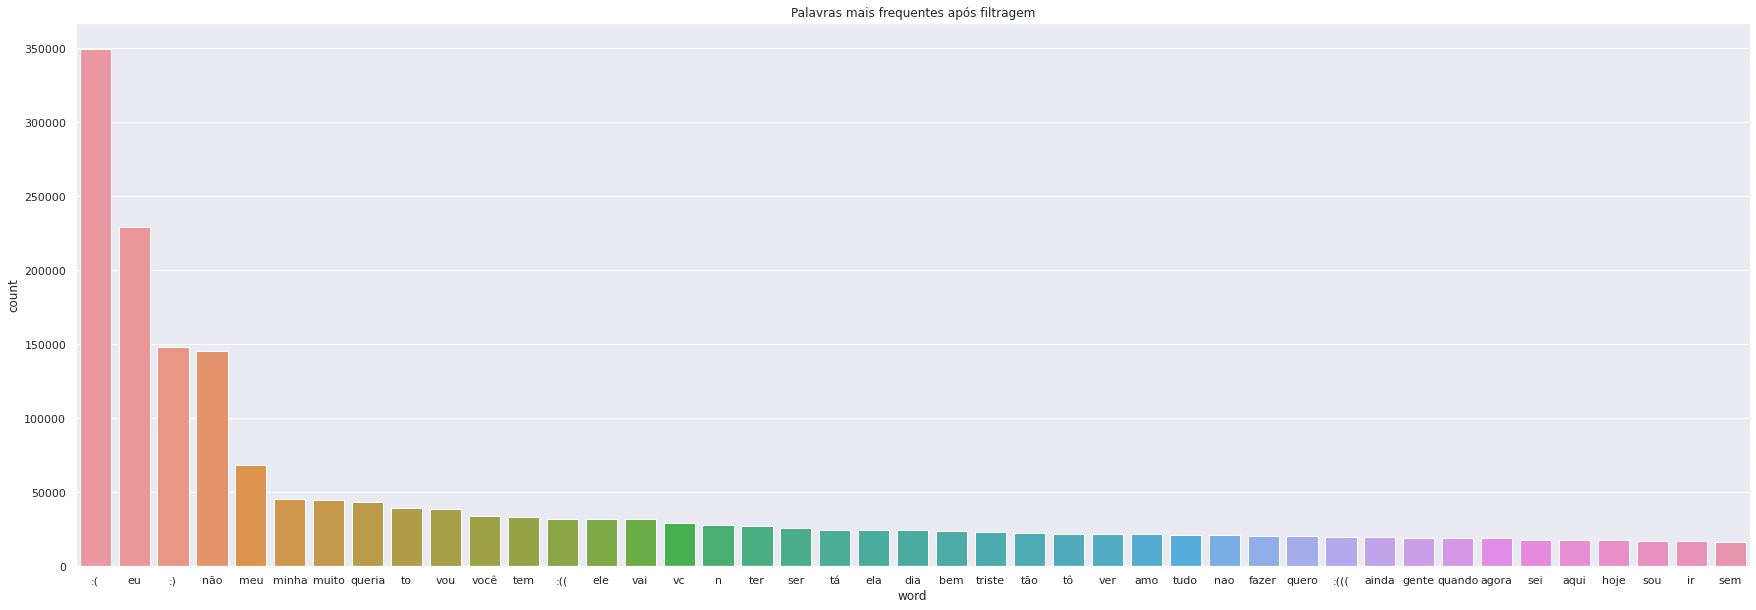

In [56]:
most_common_words_filtered = list(zip(x, y))

most_common_words_filtered_df = pd.DataFrame(
    most_common_words_filtered, columns=["word", "count"]
)


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="word", y="count", data=most_common_words_filtered_df)
plt.title("Palavras mais frequentes após filtragem")
plt.show()


In [57]:
final_stop_words = stopwords


positive_filter = remover_stop_words(positive_text, final_stop_words)
negative_filter = remover_stop_words(negative_text, final_stop_words)
all_text_filter = remover_stop_words(all_text, final_stop_words)


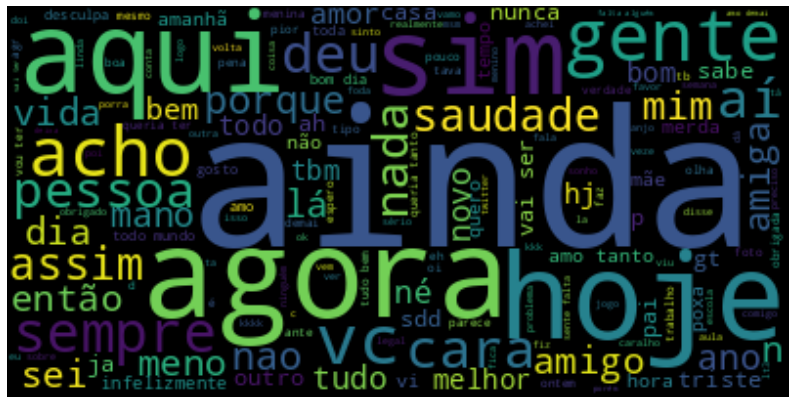

In [24]:
wordcloud = WordCloud().generate(all_text_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


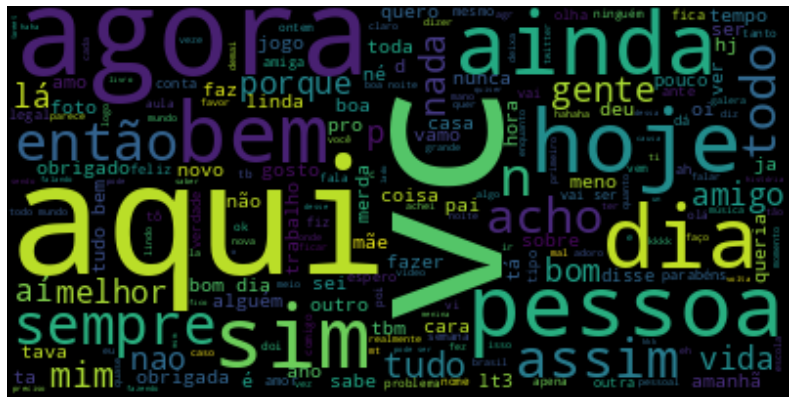

In [25]:
# Generate a word cloud image
wordcloud = WordCloud().generate(positive_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


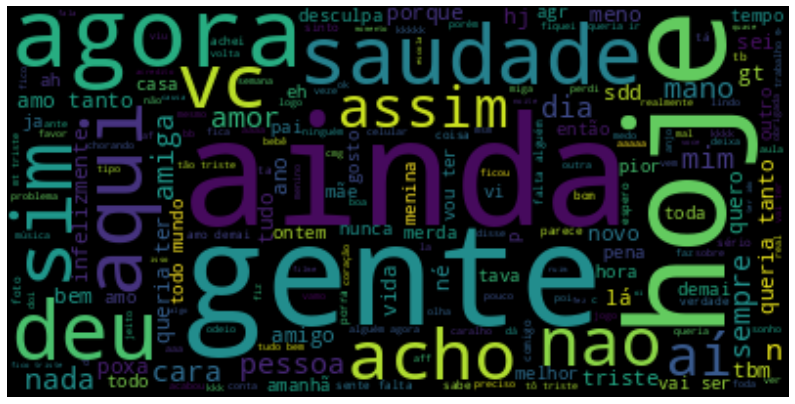

In [26]:
wordcloud = WordCloud().generate(negative_filter)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


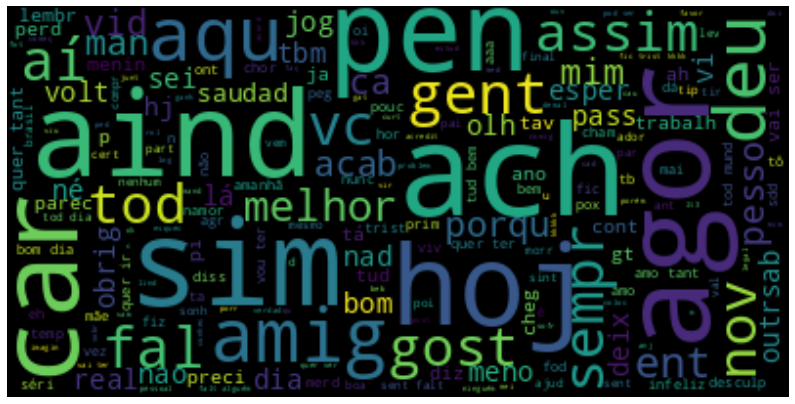

In [27]:
wordcloud = WordCloud().generate(stemming(all_text_filter))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


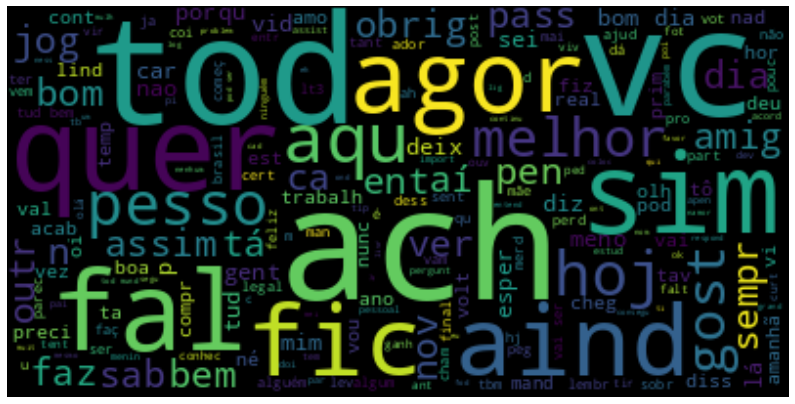

In [28]:
wordcloud = WordCloud().generate(stemming(positive_filter))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [34]:
wordcloud = WordCloud().generate(stemming(negative_filter))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


KeyboardInterrupt: 

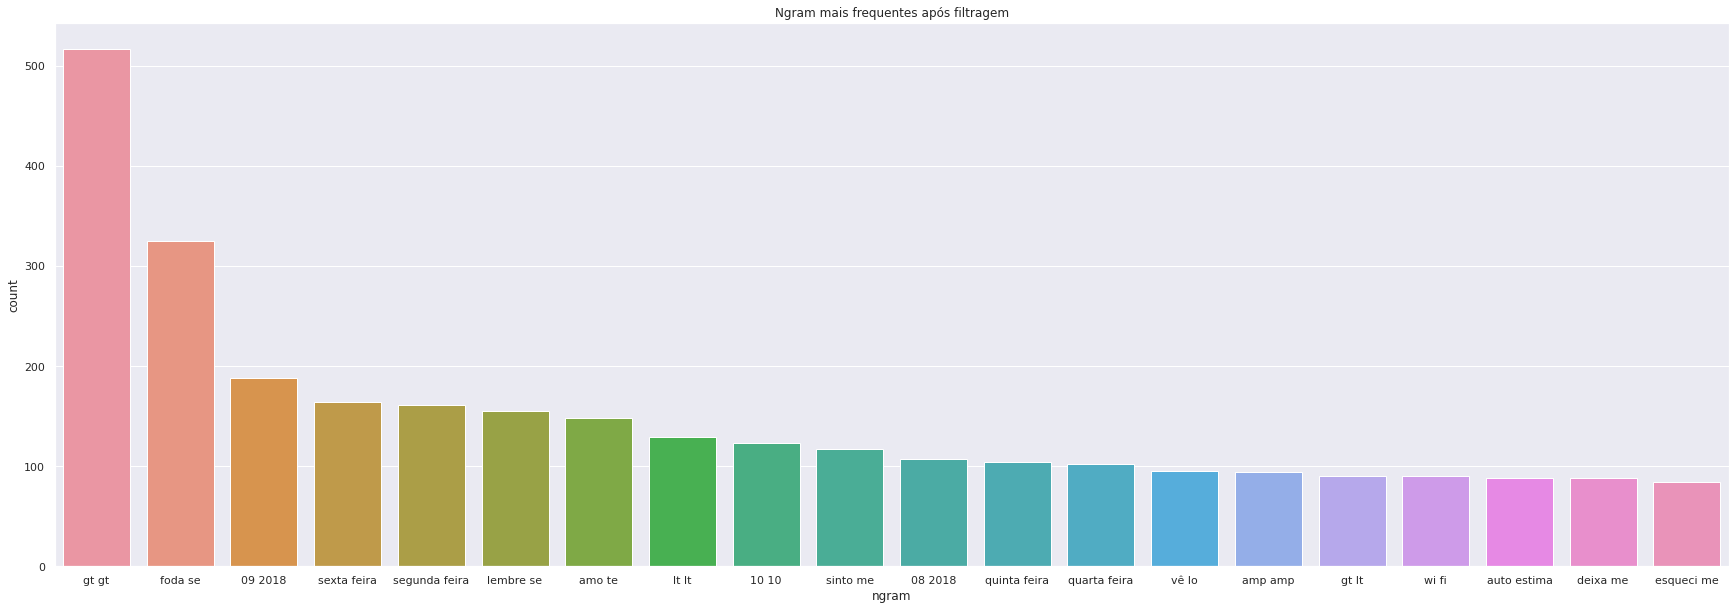

In [58]:
top_2_gram = get_top_ngram(all_text_filter.split(), gram_size=2, top_gram=20 )


top_2_gram_df = pd.DataFrame(top_2_gram, columns=["ngram", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="ngram", y="count", data=top_2_gram_df)
plt.title("Ngram mais frequentes após filtragem")
plt.show()


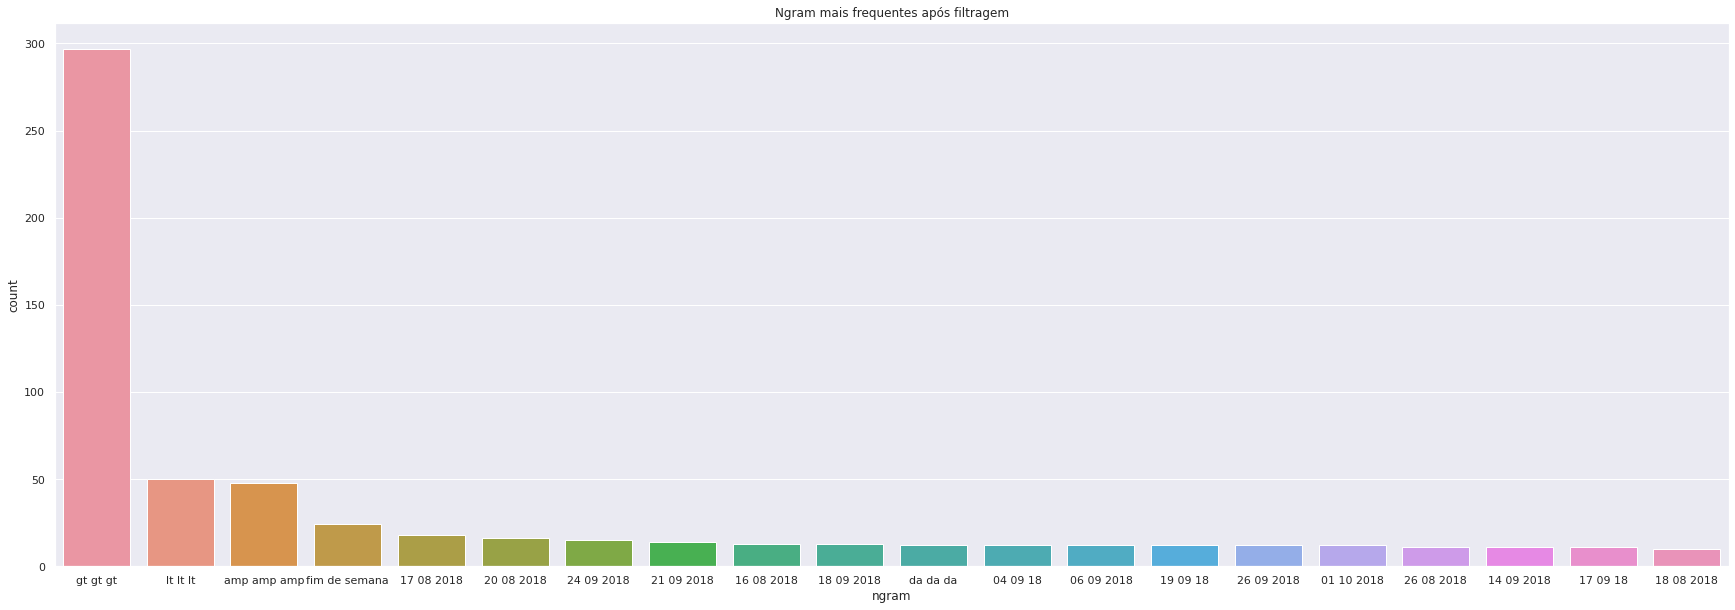

In [59]:
top_3_gram = get_top_ngram(all_text_filter.split(), gram_size=3, top_gram=20)


top_3_gram_df = pd.DataFrame(top_3_gram, columns=["ngram", "count"])


sns.set(rc={"figure.figsize": (30, 10)})
sns.barplot(x="ngram", y="count", data=top_3_gram_df)
plt.title("Ngram mais frequentes após filtragem")
plt.show()
